In [10]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'dataset/table_AIH_2009_2024_CLEAN.csv', sep=';')

In [3]:
df.head()

,ano,mes,municipio,regiao_codigo,regiao_nome,uf_codigo,uf,uf_nome,capital,numero_habitantes,populacao_faixa,diagnostico_ultrasonografia_qtd,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_val,partos_e_nascimentos_val,cirurgias_obstetricas_val,longitude,latitude
0,2009,1,Alta Floresta D'Oeste,1,Norte,11,RO,Rondônia,Não,21495,03 - De 20.001 a 50.000 habitantes,2.0,7.0,2.0,48.4,3103.80,1091.46,-61.999824,-11.935540
1,2009,1,Ariquemes,1,Norte,11,RO,Rondônia,Não,96833,04 - De 50.001 a 100.000 habitantes,7.0,77.0,63.0,196.9,34141.80,27791.01,-63.033269,-9.908463
2,2009,1,Cabixi,1,Norte,11,RO,Rondônia,Não,5363,01 - Até 10.000 habitantes,NaN,10.0,NaN,NaN,4434.00,NaN,-60.544314,-13.499763
3,2009,1,Cacoal,1,Norte,11,RO,Rondônia,Não,86895,04 - De 50.001 a 100.000 habitantes,NaN,67.0,19.0,NaN,34338.92,10002.76,-61.442944,-11.433865
4,2009,1,Cerejeiras,1,Norte,11,RO,Rondônia,Não,15890,02 - De 10.001 a 20.000 habitantes,NaN,13.0,7.0,NaN,5606.33,3003.92,-60.818426,-13.195033


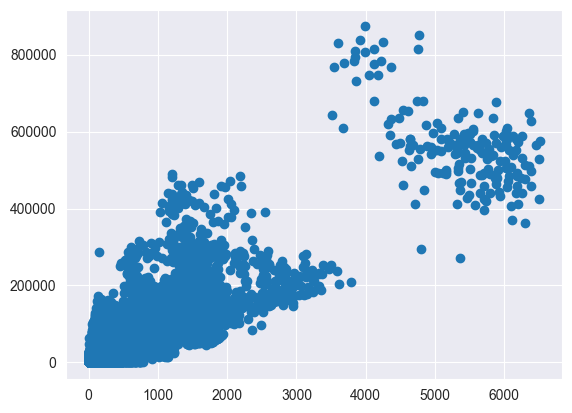

In [58]:
plt.scatter(df['partos_e_nascimentos_qtd'], df['diagnostico_ultrasonografia_val'])

In [14]:
import multiprocessing

multiprocessing.cpu_count()

12

In [59]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['partos_e_nascimentos_qtd','diagnostico_ultrasonografia_val']])

In [60]:
y_predicted

array([0, 0, 0, ..., 0, 0, 2])

In [21]:
df.dropna(inplace=True)
df.isnull().sum()

ano                                0
mes                                0
municipio                          0
regiao_codigo                      0
regiao_nome                        0
uf_codigo                          0
uf                                 0
uf_nome                            0
capital                            0
numero_habitantes                  0
populacao_faixa                    0
diagnostico_ultrasonografia_qtd    0
partos_e_nascimentos_qtd           0
cirurgias_obstetricas_qtd          0
diagnostico_ultrasonografia_val    0
partos_e_nascimentos_val           0
cirurgias_obstetricas_val          0
longitude                          0
latitude                           0
dtype: int64

In [61]:
df['cluster'] = y_predicted

In [62]:
df['cluster'].value_counts()

cluster
0    160015
2      2731
1       265
Name: count, dtype: int64

In [67]:
agrupado = df.groupby(['regiao_nome', 'cluster'])

In [70]:
agrupado.head()

,ano,mes,municipio,regiao_codigo,regiao_nome,uf_codigo,uf,uf_nome,capital,numero_habitantes,populacao_faixa,diagnostico_ultrasonografia_qtd,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_val,partos_e_nascimentos_val,cirurgias_obstetricas_val,longitude,latitude,cluster
0,2009,1,Alta Floresta D'Oeste,1,Norte,11,RO,Rondônia,Não,21495,03 - De 20.001 a 50.000 habitantes,2.0,7.0,2.0,48.40,3103.80,1091.46,-61.999824,-11.935540,0
1,2009,1,Ariquemes,1,Norte,11,RO,Rondônia,Não,96833,04 - De 50.001 a 100.000 habitantes,7.0,77.0,63.0,196.90,34141.80,27791.01,-63.033269,-9.908463,0
11,2009,1,Ji-Paraná,1,Norte,11,RO,Rondônia,Não,124333,05 - De 100.001 a 500.000 habitantes,65.0,84.0,78.0,1861.75,37245.60,36709.18,-61.945095,-10.882051,0
13,2009,1,Nova Brasilândia D'Oeste,1,Norte,11,RO,Rondônia,Não,15679,02 - De 10.001 a 20.000 habitantes,2.0,16.0,4.0,48.40,7094.40,2182.92,-62.308230,-11.721325,0
14,2009,1,Ouro Preto do Oeste,1,Norte,11,RO,Rondônia,Não,35044,03 - De 20.001 a 50.000 habitantes,8.0,8.0,10.0,248.60,3469.90,4577.34,-62.261055,-10.723574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619866,2018,4,Recife,2,Nordeste,26,PE,Pernambuco,Sim,1488920,07 - Acima de 1.000.000 habitantes,8017.0,1666.0,1371.0,335731.50,1137900.29,1036011.01,-34.888942,-8.062762,1
625436,2018,5,Recife,2,Nordeste,26,PE,Pernambuco,Sim,1488920,07 - Acima de 1.000.000 habitantes,8467.0,1796.0,1524.0,365298.08,1248662.71,1148838.11,-34.888942,-8.062762,1
708986,2019,8,Recife,2,Nordeste,26,PE,Pernambuco,Sim,1488920,07 - Acima de 1.000.000 habitantes,7693.0,1704.0,1466.0,335553.44,1153301.33,1020176.23,-34.888942,-8.062762,1
736836,2020,1,Recife,2,Nordeste,26,PE,Pernambuco,Sim,1488920,07 - Acima de 1.000.000 habitantes,7651.0,1457.0,1395.0,325507.25,1020664.56,936797.26,-34.888942,-8.062762,1
